In [1]:
from solver import classic_solver
from aspen import aspen_solver
import partion
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(u):
    return np.array([u**2+1, 2*max(u, 0)])

class Diffusion():
    def __init__(self, Nx, Amp=0, Period=0, Scale=1, model=None):
        self.val = np.zeros((Nx+1, 1))
        for i in range(Nx+1):
            self.val[i] = (
                Amp * np.sin(Period * 2*np.pi * (i+1) / (Nx+1)) + 1) * Scale
        self.model = model

In [5]:
Nx = 1000
Nt = 100
param = {
    'Nx': Nx, 
    'Nt': Nt,
}
D = Diffusion(Nx, 0.9, 1, 0.5e-1, model=model)
solver = classic_solver(param, D)
solver.setBoundary(0, 0)
solver.setInitial(0.5, 2, 1)
solver.setSources([0.6], [0])

X_cl, code, message = solver.solve()
t_cl = solver.t
print(X_cl)

[[1.00628302 0.18395257 0.04505367 ... 0.00355945 0.00353643 0.        ]
 [1.01256505 0.23234982 0.08305534 ... 0.00709884 0.00705293 0.        ]
 [1.01884509 0.27800452 0.12037093 ... 0.01061826 0.01054959 0.        ]
 ...
 [0.98743495 0.22110543 0.06388466 ... 0.00376111 0.00373784 0.        ]
 [0.99371698 0.1942747  0.04480876 ... 0.00250031 0.00248484 0.        ]
 [1.         0.16598435 0.02555196 ... 0.00124662 0.00123891 0.        ]]


In [3]:
Nx = 1000
Nt = 100
Nd = 6
param = {
    'Nx': Nx, 
    'Nt': Nt,
    'Nd': Nd
}
D = Diffusion(Nx, 0.9, 1, 0.5e-1, model=model)

part = partion.partion_equally
solver = aspen_solver(param, D, part)
solver.setBoundary(0, 0)
solver.setInitial(0.5, 2, 1)
solver.setSources([0.6], [0])

X, code, message = solver.solve()
t = solver.t
print(X)

[[1.00628302 0.05997455 0.03562684 ... 0.00353995 0.00351715 0.        ]
 [1.01256505 0.11716756 0.07087443 ... 0.00705994 0.00701448 0.        ]
 [1.01884509 0.17146593 0.1056236  ... 0.01056008 0.01049208 0.        ]
 ...
 [0.98743495 0.11050878 0.05035725 ... 0.00375479 0.00373153 0.        ]
 [0.99371698 0.07553717 0.03356748 ... 0.00249611 0.00248064 0.        ]
 [1.         0.03870271 0.01676527 ... 0.00124453 0.00123682 0.        ]]


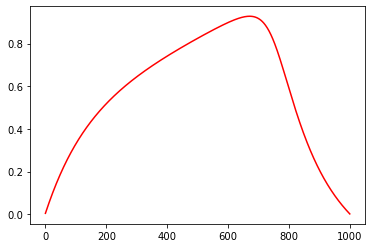

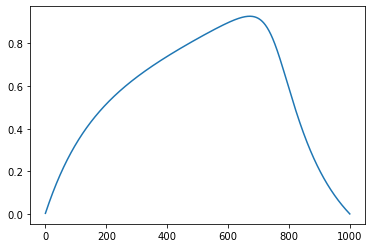

OK


In [8]:
step = 70
plt.plot(X_cl[:, step], color = 'r')
plt.show()
plt.plot(X[:, step])
plt.show()
print(message)